In [495]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
from frites import set_mpl_style
set_mpl_style()


In [496]:
class Environment :
    
    def __init__(self,p,V_abs):
        """
        p:the probability of the target going right
        V_abs: is the absolute value of the target's velocity
        """
        self.p=p
        self.V_abs=V_abs
        
    def loss(self,Vapp,V_target,k):
        """
        k: fitting parameter
        Vapp: the velocity of the eye at tapp which is the latency time
        V_target: target velocity can be negative depending on the direction
        """
        return np.abs(V_target-Vapp)
    
    def step(self,Vapp,k):
        
        V_target=self.V_abs*(2*st.bernoulli.rvs(self.p)-1)
        return self.loss(Vapp,V_target,k)
    
        
    
    

In [497]:
(2*st.bernoulli.rvs(0.5)-1)

-1

In [574]:
env=Environment(0.7,15)
def policyGradient(env, lr,n_trials):
    V=[]
    mu=0
    sigma=1
    k=.5
    for i in range(n_trials):
        
        v_app=st.norm.rvs(loc=mu,scale=sigma)
        
        dv_log=(v_app-mu)/sigma**2
        
        reward=env.step(v_app,k)
        
        mu= mu - lr *reward * dv_log

        V.append(v_app)

    return V
    
    
    
    

In [577]:
V=policyGradient(env,.01,1500)

9.936332725045874

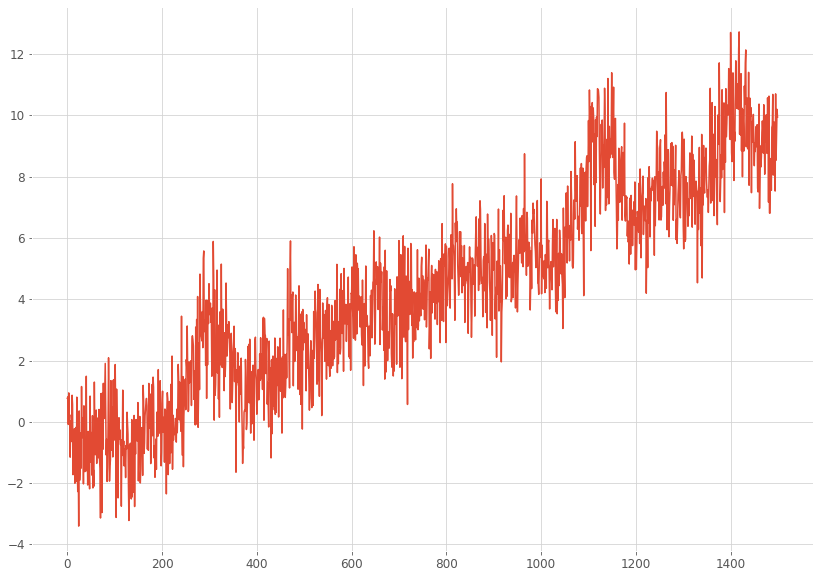

In [578]:
plt.plot(V)
V[-1]

In [568]:
v_app=st.norm.rvs(loc=0,scale=0.1)
st.norm.pdf(v_app,loc=0,scale=0.1)

1.1538352504393228